In [1]:
import os
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import itertools as it
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from pprint import pprint

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_lg")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nevin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#execute only once
#!python -m spacy download en_core_web_lg 

In [2]:
reviews_df = pd.read_csv('sg_data.csv')
reviews_df = reviews_df[['comment']]
reviews_df.head()

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,comment
0,From Istabul to Athens. Seat 3C doesnt have an...
1,I traveled Athens-Zurich with Aegean Airlines ...
2,very tiny leg room as I am quite tall. flight ...
3,Exit row 12F was nice for the 2.5 hour ZRH-ATH...
4,It is a wonderful seat at no additional cost (...


In [3]:
#case text to lower case, remove punctuation, remove extra whitepsace in the string and on both sides of the string
reviews_df['comment'] = reviews_df['comment'].str.lower().str.replace("'", '').str.replace('[^\w\s]', ' ').str.replace(" \d+", " ").str.replace(' +', ' ').str.strip()

reviews_df.head(5)

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \d
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \d
<ipython-input-3-cd908feb4e74>:2: DeprecationWarning: invalid escape sequence \w
  reviews_df['comment'] = reviews_df['comment'].str.lower().str.replace("'", '').str.replace('[^\w\s]', ' ').str.replace(" \d+", " ").str.replace(' +', ' ').str.strip()
<ipython-input-3-cd908feb4e74>:2: DeprecationWarning: invalid escape sequence \d
  reviews_df['comment'] = reviews_df['comment'].str.lower().str.replace("'", '').str.replace('[^\w\

,comment
0,from istabul to athens seat c doesnt have any ...
1,i traveled athens zurich with aegean airlines ...
2,very tiny leg room as i am quite tall flight a...
3,exit row f was nice for the hour zrh ath fligh...
4,it is a wonderful seat at no additional cost s...


In [4]:
reviews_list = reviews_df.comment.values.tolist()

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
reviews_list[12]

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'it was very close to the rear exit with engine view just fine for me'

In [ ]:
# Remove Emails
#reviews_list = [re.sub(r'\S*|\S*\s?', '', sent) for sent in reviews_list]
#reviews_list = [re.sub(r'\s+', ' ', sent) for sent in reviews_list]
#reviews_list = [re.sub(r"\'", "", sent) for sent in reviews_list]

In [6]:
len(reviews_list)

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16751

In [7]:
reviews_list[0]

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'from istabul to athens seat c doesnt have any extra legroom'

In [8]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(reviews_list))

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
pprint(data_words[:2])

[['from',
  'istabul',
  'to',
  'athens',
  'seat',
  'doesnt',
  'have',
  'any',
  'extra',
  'legroom'],
 ['traveled',
  'athens',
  'zurich',
  'with',
  'aegean',
  'airlines',
  'and',
  'the',
  'sx',
  'dnb',
  'aircraft',
  'chose',
  'the',
  'position',
  'this',
  'place',
  'is',
  'awkward',
  'the',
  'foot',
  'space',
  'is',
  'minimal',
  'and',
  'the',
  'window',
  'is',
  'in',
  'an',
  'uncomfortable',
  'position',
  'the',
  'display',
  'is',
  'two',
  'rows',
  'ahead']]


C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[1]]])

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['traveled', 'athens', 'zurich', 'with', 'aegean', 'airlines', 'and', 'the', 'sx', 'dnb', 'aircraft', 'chose', 'the', 'position', 'this', 'place', 'is', 'awkward', 'the', 'foot', 'space', 'is', 'minimal', 'and', 'the', 'window', 'is', 'in', 'an', 'uncomfortable', 'position', 'the', 'display', 'is', 'two', 'rows', 'ahead']


In [11]:
stop_words = stopwords.words('english')
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN']):#, 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])#, 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['seat', 'legroom']]


In [31]:
print(data_lemmatized[:5])

[['seat', 'legroom'], ['position', 'place', 'foot', 'space', 'window', 'position', 'display', 'row'], ['leg', 'room', 'flight', 'attendant', 'meal'], ['exit', 'row', 'hour', 'zrh', 'flight', 'seat', 'cabin', 'way', 'meal', 'service'], ['seat', 'cost', 'subject', 'availability', 'legdom']]


C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
import warnings
warnings.filterwarnings('ignore')

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
data_lemmatized[12]

['exit', 'engine', 'view']

In [15]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
id2word.filter_extremes(no_below=20, no_above=0.4)
id2word.compactify()

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1)]]


In [16]:
id2word[17]

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'way'

In [17]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('legroom', 1)]]

In [18]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=75,
                                           alpha='auto',
                                           per_word_topics=True)

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
pprint(lda_model.print_topics())
#doc_lda = lda_model[corpus]

[(0,
  '0.104*"class" + 0.068*"business" + 0.066*"service" + 0.062*"cabin" + '
  '0.055*"food" + 0.051*"crew" + 0.023*"width" + 0.022*"issue" + '
  '0.019*"seating" + 0.017*"thing"'),
 (1,
  '0.142*"passenger" + 0.093*"toilet" + 0.057*"meal" + 0.047*"use" + '
  '0.045*"bathroom" + 0.042*"view" + 0.028*"light" + 0.022*"cost" + '
  '0.021*"engine" + 0.019*"wing"'),
 (2,
  '0.161*"flight" + 0.086*"plane" + 0.082*"economy" + 0.041*"hour" + '
  '0.038*"aircraft" + 0.034*"time" + 0.023*"airline" + 0.020*"premium" + '
  '0.019*"entertainment" + 0.018*"screen"'),
 (3,
  '0.107*"row" + 0.078*"room" + 0.076*"leg" + 0.064*"window" + 0.049*"space" + '
  '0.033*"foot" + 0.030*"aisle" + 0.029*"front" + 0.026*"exit" + 0.026*"side"'),
 (4,
  '0.064*"galley" + 0.059*"sleep" + 0.059*"lot" + 0.048*"area" + '
  '0.045*"configuration" + 0.045*"noise" + 0.035*"comfort" + 0.035*"floor" + '
  '0.033*"section" + 0.032*"lavatory"')]


C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -5.51170383149297

Coherence Score:  0.46329790214169086


C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


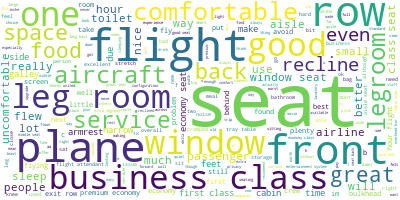

In [22]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(reviews_df['comment'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


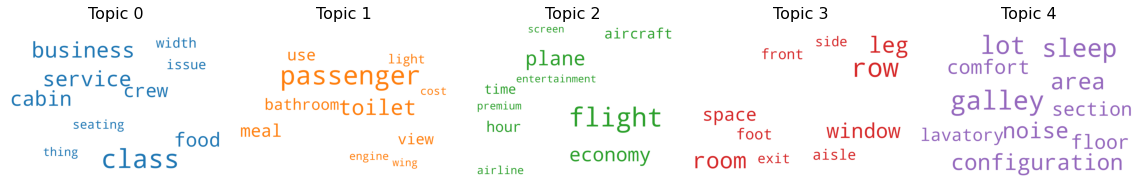

In [23]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(16,16), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-24-2753ea308d64>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


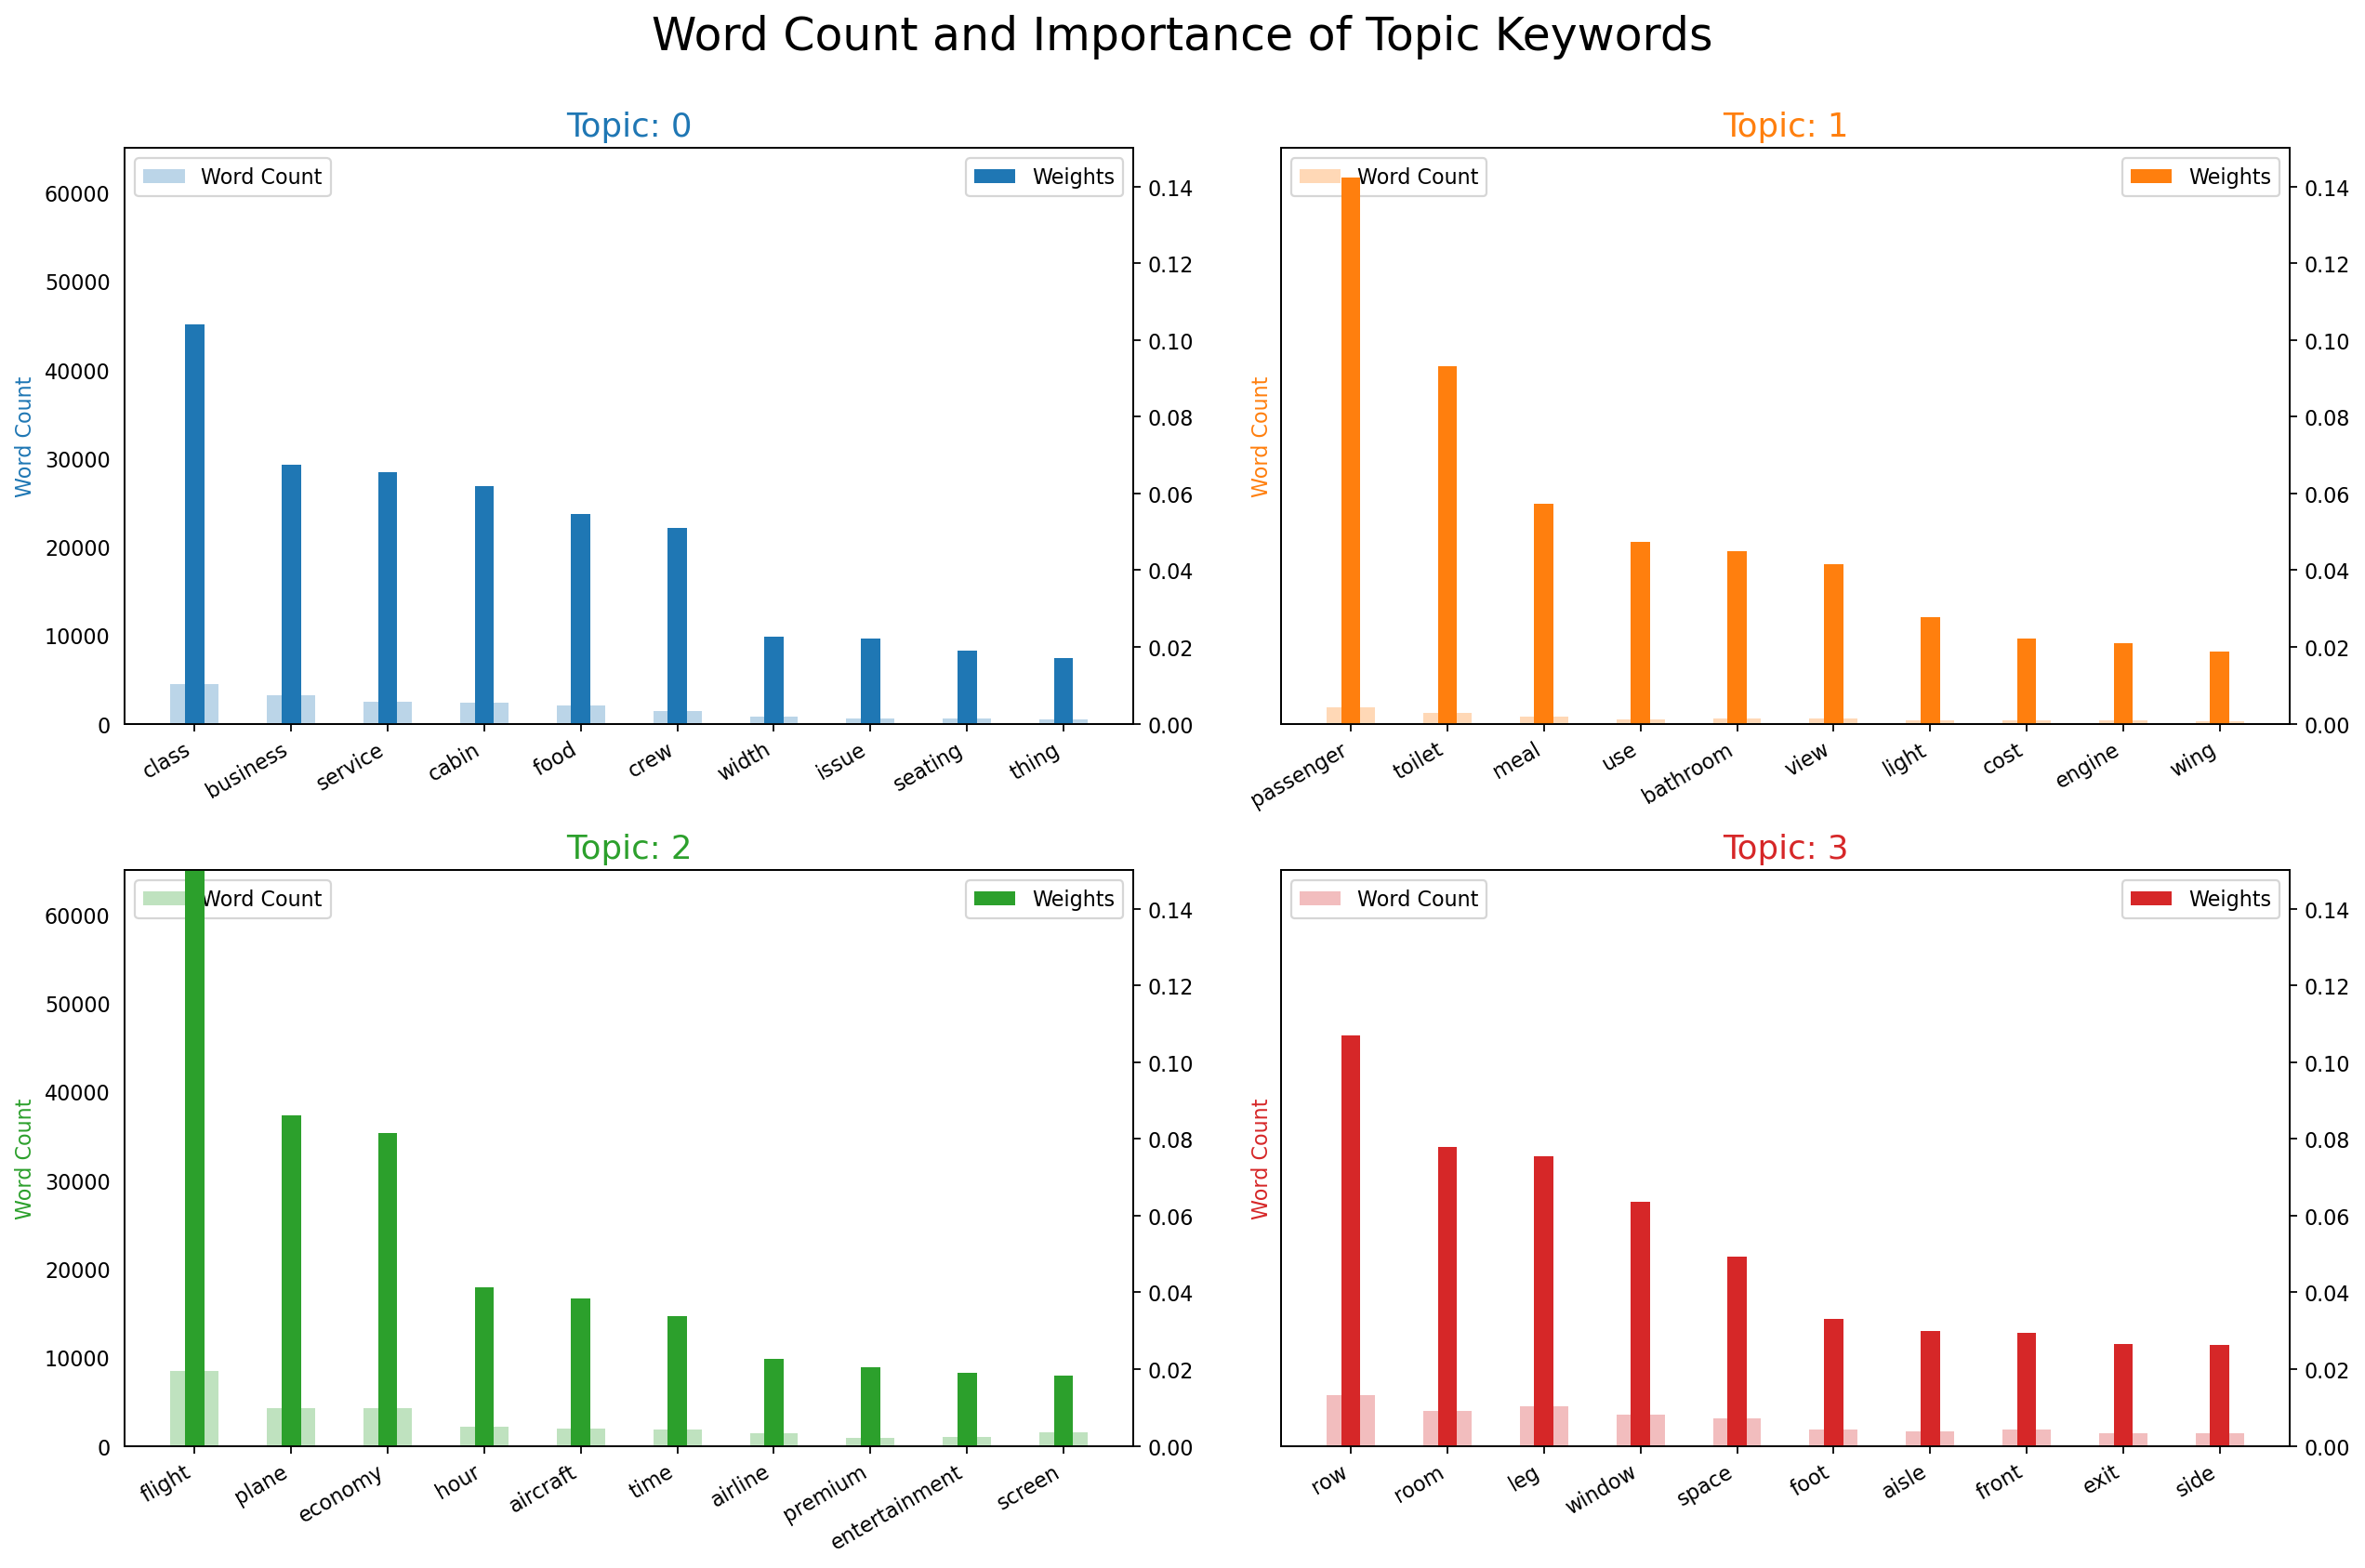

In [24]:
# Word counts of topic keywords
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_lemmatized for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.150); ax.set_ylim(0, 65000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [25]:
## To know most discussed topics in the documents

# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 10]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


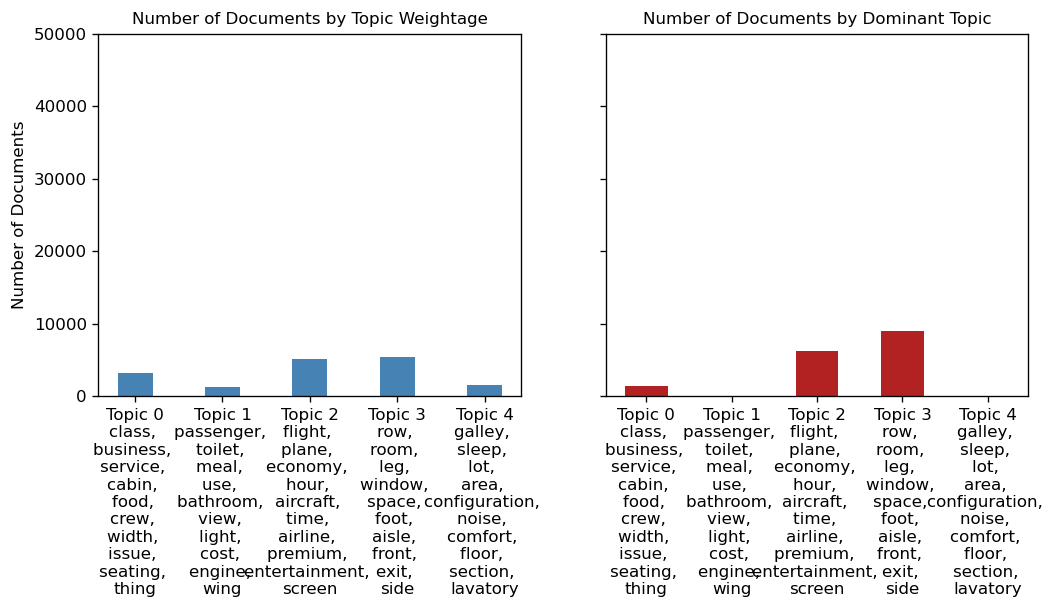

In [26]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)
# fig, ax2 = plt.subplots(1, 1, figsize=(10, 4), dpi=120, sharey=True)
# fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.4, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))
ax2.set_ylabel('Number of Documents')
ax2.set_ylim(0, 50000)


# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
#ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 50000)

plt.show()

In [27]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

C:\Users\nevin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10962 samples in 0.030s...
[t-SNE] Computed neighbors for 10962 samples in 0.881s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10962
[t-SNE] Computed conditional probabilities for sample 2000 / 10962
[t-SNE] Computed conditional probabilities for sample 3000 / 10962
[t-SNE] Computed conditional probabilities for sample 4000 / 10962
[t-SNE] Computed conditional probabilities for sample 5000 / 10962
[t-SNE] Computed conditional probabilities for sample 6000 / 10962
[t-SNE] Computed conditional probabilities for sample 7000 / 10962
[t-SNE] Computed conditional probabilities for sample 8000 / 10962
[t-SNE] Computed conditional probabilities for sample 9000 / 10962
[t-SNE] Computed conditional probabilities for sample 10000 / 10962
[t-SNE] Computed conditional probabilities for sample 10962 / 10962
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.761917
[t-SNE] KL 

Loading BokehJS ...

In [37]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.257179 -0.295990       1        1  31.304115
3      0.402957 -0.124991       2        1  31.216778
0     -0.064720  0.359082       3        1  20.206808
4     -0.041782  0.034039       4        1   9.440221
1     -0.039275  0.027861       5        1   7.832078, topic_info=             Term         Freq        Total Category  logprob  loglift
9          flight  8815.000000  8815.000000  Default  30.0000  30.0000
5             row  5845.000000  5845.000000  Default  29.0000  29.0000
63          class  3679.000000  3679.000000  Default  28.0000  28.0000
38          plane  4719.000000  4719.000000  Default  27.0000  27.0000
50        economy  4474.000000  4474.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
30         weight   114.417202   115.278599   Topic5  -4.7862   2.5394
339  announcement   103.066723   103.932262   Topic5  -4.8907   2.5386
96            ear    99.528051   100.393991   Topic5  -4.9256   2.5383
713        bottle    97.917718    98.782688   Topic5  -4.9419   2.5381
707          port    96.391942    97.246166   Topic5  -4.9577   2.5381

[181 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
151       3  0.997243    access
249       1  0.997889       air
83        1  0.999795  aircraft
43        1  0.999205   airline
436       1  0.997328  airplane
...     ...       ...       ...
209       3  0.999385     width
308       1  0.995858      wifi
7         2  0.999633    window
105       5  0.995151      wing
69        3  0.997781      year

[151 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 5, 2])